In [5]:
import numpy as np
import matplotlib.pyplot as plt

loading .\data_record_2023-10-11_11-24-31.csv
loading .\data_record_2023-10-11_11-25-38.csv
loading .\data_record_2023-10-11_11-30-11.csv


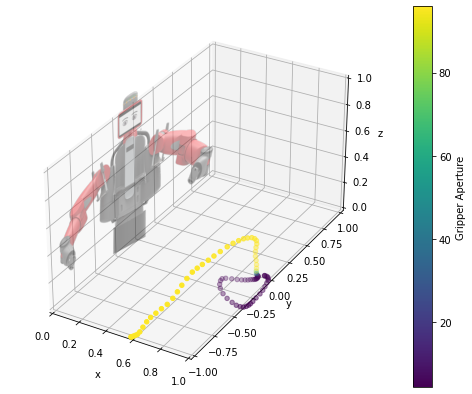

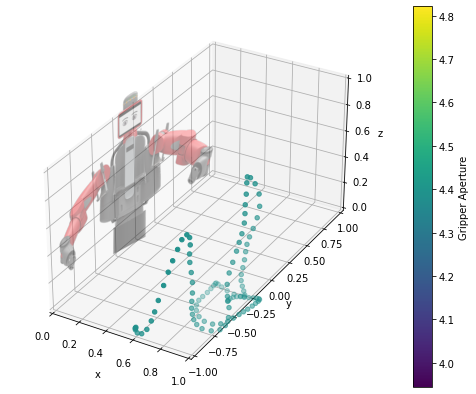

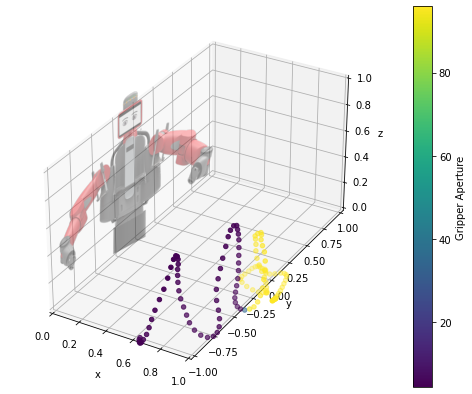

In [7]:
import os
folder_path = '.'
arrays = []
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        print("loading "+file_path)
        # Use numpy to load the CSV file into an array
        data = np.genfromtxt(file_path, delimiter=',', skip_header=1)
        arrays.append(data)

for data in arrays:
    from mpl_toolkits.mplot3d import Axes3D
    # Extract the columns
    px_column = data[:, 3]
    py_column = data[:, 4]
    pz_column = data[:, 5]
    gripper_position_column = data[:, 10]

    fig = plt.figure(figsize=(9,7))
    ax = fig.add_subplot(111, projection='3d')
    
    # X goes from 0 to 1 (ahead), Y from -1 (right robot) to 1 (left robot), Z from 0 (table) a 1 (head)
    ax.set_xlim(0, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(0, 1)
    # Set non-cubical aspect ratio of the graph
    ax.set_box_aspect([1,2,1])
    
    img_path='./img/baxter-tilted.png'
    if os.path.isfile(img_path):
        # Add an image to the plot
        img = plt.imread(img_path)  
        ax.imshow(img, extent=[-0.07, 0.005, -0.04, 0.07], aspect='auto',  alpha=0.5)  

    scatter = ax.scatter(px_column, py_column, pz_column, c=gripper_position_column, cmap='viridis')

    # Add a colorbar
    cbar = plt.colorbar(scatter)
    cbar.set_label('Gripper Aperture')

    # Set labels for each axis
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    # Show the plot
    plt.show()